# Create MTSSim spectra
This notebook is used to simulate spectra at the MIRI input plane given a set of MTSSim input parameters.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
from mtssim import MTSSim

import warnings
warnings.simplefilter('ignore')

In [2]:
# inputs
Usefilter = 'HOLE'
VASap = 100.
target = 'EXT'
MIRI='OFF'
pssON = None
parfile=None
instruct = {'OUTPATH':'/Users/ioannisa/Desktop/python/miri_devel/notebooks/pyMTSSim/OUTPUT/', # Path to the "outputs" folder.
            'SAVEEPS':False,                                                                  # Save graphs to .eps files? (yes/no).
            'EPSROOT':'Test',                                                                 # Root of the graphs' names.
            'SAVESPC':True,                                                                  # Save spectra to plain text file? (yes/no)
            'SPCFILE':'MTSSim_spec.fits',                                                     # Name of the file with the spectra.
            'SAVESUM':False,                                                                  # Save file with summary of results?
            'SPCSUMFILE':'Test_sim.fits',                                                     # Name of file with summary of results.
            'UNITS':'JY',                                                                     # Units of irradiance [MKS, CGS, PH, JY].
            'WMIN':2.,                                                                        # Minimum wavelength (>= 2 um)
            'WMAX':30.,                                                                       # Maximum wavelength (<=30 um)
            'DIVERGENCE':True,                                                                # Does the beam comming out of the BB diverge?
            'VASEMIT':True,                                                                   # Does the VAS emit? (yes/no)
            'CORRVAS':True}                                                                   # Account for difference between commanded and actual position of the VAS? (yes/no)
fluxes = None
plot = True

In [3]:
# run simulations
Vdata = {}
for BB_Temp in [800,600,400]:
    instruct['SPCFILE'] = 'MTS{}K_spec.fits'.format(str(int(BB_Temp)))
    Vdata[str(BB_Temp)+'K'] = MTSSim(BB_Temp,Usefilter,VASap,target,MIRI=MIRI,parfile=parfile,instruct=instruct,fluxes=fluxes)

<IPython.core.display.Javascript object>


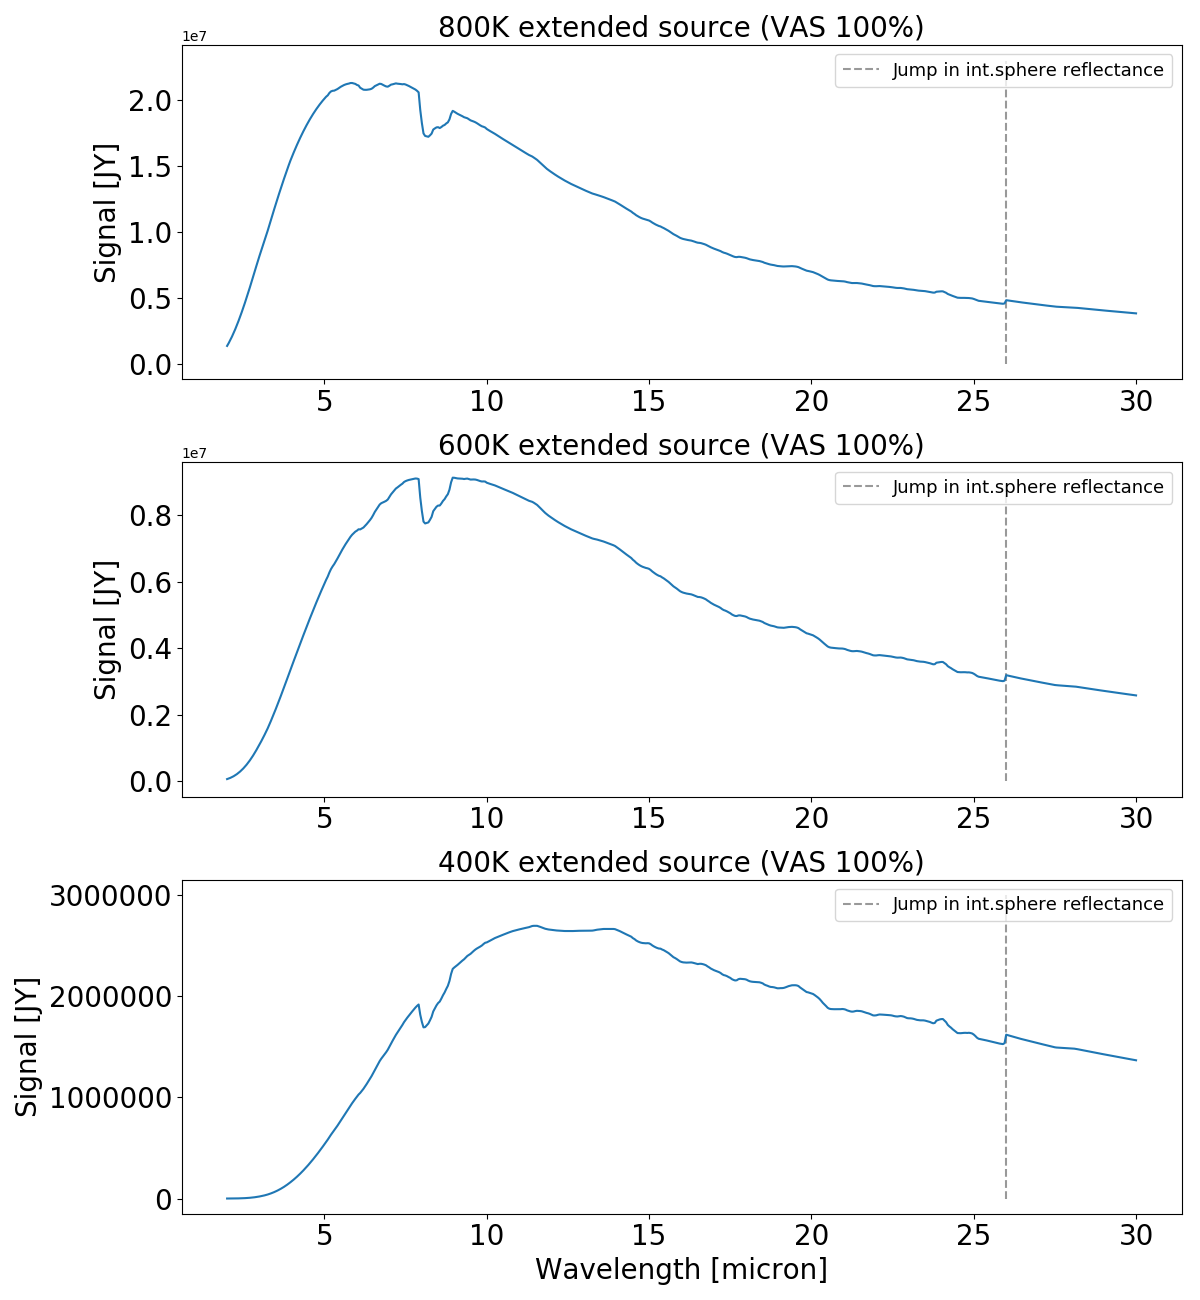

In [4]:
# make some comparative plots
import matplotlib.pyplot as plt
%matplotlib notebook

max_signal = [2.3E7,0.9E7,0.3E7]
fig,axs = plt.subplots(3,1,figsize=(12,13))
for plot,BB_Temp in enumerate(['800K','600K','400K']):
    axs[plot].set_title('{} extended source (VAS {}%)'.format(BB_Temp,int(VASap)),fontsize=20)
    axs[plot].plot(Vdata[BB_Temp]['wave'],Vdata[BB_Temp]['SPC'])
    axs[plot].vlines(26,0,max_signal[plot],linestyle='dashed',alpha=0.4,label='Jump in int.sphere reflectance')
    axs[plot].set_ylabel('Signal [{}]'.format(Vdata[BB_Temp]['units']),fontsize=20)
    axs[plot].legend(loc='upper right',fontsize=13)
    axs[plot].tick_params(axis='both',labelsize=20)
axs[2].set_xlabel('Wavelength [micron]',fontsize=20)
plt.tight_layout()